202100396 권지원 
## 게임별 성향과 동시접속자 및 인기 게임에 대한 성향 분석

In [1]:
#dataset
#steam_charts_players.csv - 2012년부터 2020년까지 각 스팀에서 서비스 중인 게임의 월별 동시접속자 수
# steam_games_all.csv - 2019년까지 스팀에서 판매 중인 게임 목록

In [15]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [131]:
import warnings 
warnings.filterwarnings(action='ignore')

In [16]:
data_file_steam_games = 'steam_games_all.csv'
data_file_steam_charts = 'steam_charts_players.csv'

df_steam_games = pd.read_csv(data_file_steam_games)
df_steam_charts = pd.read_csv(data_file_steam_charts)

In [17]:
#df_steam_games.info()
#df_steam_charts.info()

In [18]:
#스팀 게임 태그 빈도 분석

In [20]:
#steam_games_all 데이터 전처리
#태그 분석을 위한 wordcloud 생성을 위해 필요한 열만 추출합니다.
#steam_games_al의 모든 행 중에서 name, popular_tags만 사용할 예정이므로 새로운 데이터 프레임을 정의합니다.
df_wordcloud = df_steam_games[["name", "popular_tags"]]

#결측치가 있는 행은 태그 분석에 사용할 태그가 없다는 의미이므로 제거합니다.
df_wordcloud = df_wordcloud.dropna(how='any', axis=0)

전체 스팀 게임 태그 성향 분석


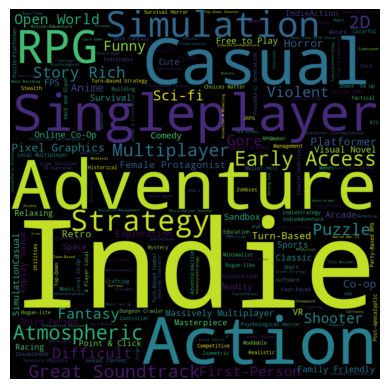

상위 50개 태그에 대한 스팀 게임 태그 성향 분석


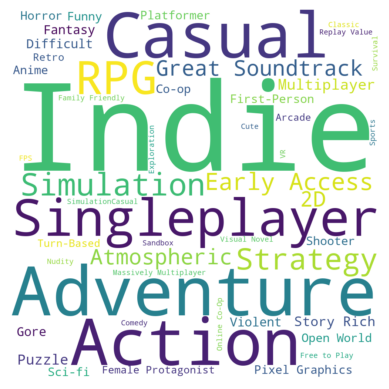

In [43]:
#wordcloud를 위한 df_wordcloud 전처리

#각 열의 태그를 모두 모아 리스트 tags 리스트에 넣어줍니다.

tags = []

for elem in df_wordcloud.popular_tags:
    tags.extend(elem)

#리스트 원소를 모두 하나의 문자열로 조합합니다.

all_tags = "".join(tags)
    

splited = all_tags.split(',')
cnt_tags = Counter(splited)

#word cloud 형성

wordcloud_total = WordCloud(width=500, height=500, scale=2.0, max_font_size=250)
wc_gen = wordcloud_total.generate_from_frequencies(cnt_tags)

print("전체 스팀 게임 태그 성향 분석")

plt.imshow(wordcloud_total, interpolation='bilinear')
plt.axis("off")
plt.show(wc_gen)

#최대 글자 개수를 50개로 제한하고 배경이 흰색인 wordcloud
wordcloud_total_50 = WordCloud(max_words=50, width=500, height=500, scale=2.0, max_font_size=250, background_color='white')
wc_gen_50 = wordcloud_total_50.generate_from_frequencies(cnt_tags)

print("상위 50개 태그에 대한 스팀 게임 태그 성향 분석")

plt.imshow(wordcloud_total_50, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
print(all_tags)


In [ ]:
#태그별의 빈도 수 

splited = all_tags.split(',')
cnt_tags = Counter(splited)

sorted(cnt_tags)

print(cnt_tags)


In [ ]:
#wordcloud를 이미지를 이용하여 시각화합니다.

#업로드한 이미지 파일을 array로 변환합니다.

console_mask = np.array(Image.open("console3.png"))
console_mask

#이미지의 값을 변형합니다.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
    
transformed_console_mask = np.ndarray((console_mask.shape[0], console_mask.shape[1]), np.int32)

for i in range(len(console_mask)):
    transformed_console_mask[i] = list(map(transform_format, console_mask[i]))
    
transformed_console_mask

#wordcloud를 특정 이미지 모양으로 시각화한 결과를 출력합니다. 
print("상위 10개 태그에 대한 스팀 게임 태그 성향 분석")

wc10= WordCloud(max_words=10, background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'darkblue')
wc10.generate_from_frequencies(cnt_tags)

wc10.to_file("steam_tag_console10.png")

plt.figure(figsize=[5,5])
plt.imshow(wc10, interpolation='bilinear')
plt.axis("off")
plt.show()

#단어 수 20개

print("상위 20개 태그에 대한 스팀 게임 태그 성향 분석")
wc20= WordCloud(max_words=20, background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'blue')
wc20.generate_from_frequencies(cnt_tags)

wc20.to_file("steam_tag_console20.png")

plt.figure(figsize=[20,10])
plt.imshow(wc20, interpolation='bilinear')
plt.axis("off")
plt.show()
#단어 수 100개
print("상위 100개 태그에 대한 스팀 게임 태그 성향 분석")
wc100= WordCloud(max_words=100, background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'red')
wc100.generate_from_frequencies(cnt_tags)

wc100.to_file("steam_tag_console100.png")

plt.figure(figsize=[20,10])
plt.imshow(wc100, interpolation='bilinear')
plt.axis("off")
plt.show()
#단어 수 1000개
print("상위 1000개 태그에 대한 스팀 게임 태그 성향 분석")
wc1000= WordCloud(max_words=1000, background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'skyblue')
wc1000.generate_from_frequencies(cnt_tags)

wc1000.to_file("steam_tag_console1000.png")

plt.figure(figsize=[20,10])
plt.imshow(wc1000, interpolation='bilinear')
plt.axis("off")
plt.show()
#단어 수 전체

print("전체 스팀 게임 태그 성향 분석")
wc= WordCloud(background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'black')
wc.generate_from_frequencies(cnt_tags)

wc.to_file("steam_tag_console.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
#스팀 게임 게임, 년도, 월별 동시 접속자 수 분석

#df_steam_charts = pd.read_csv(data_file_steam_charts)


In [56]:
#데이터 전처리
temp = pd.read_csv(data_file_steam_charts) #백업

#결측치 개수를 확인합니다. 

df_steam_charts.isnull().sum()

#['gain']의 결측치 1260개를 0으로 대체합니다.

df_steam_charts_cl = df_steam_charts.fillna(0)
df_steam_charts_cl.isnull().sum() #재확인

gamename         0
year             0
month            0
avg              0
gain             0
peak             0
avg_peak_perc    0
dtype: int64

In [57]:
df_steam_charts_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           83789 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [58]:
#['month'] 데이터가 모두 문자형이므로 숫자로 바꿔줍니다.

#월 이름을 숫자로 변환합니다.

def month_name(x):
    months = {
        'January ' : 1,
        'February ': 2,
        'March ': 3,
        'April ': 4,
        'May ': 5,
        'June ': 6,
        'July ': 7,
        'August ': 8,
        'September ': 9,
        'October ': 10, 
        'November ': 11,
        'December ': 12
    }
    try:
        m = months[x]
        m = int(m)
    except:
        raise ValueError('Not a month or already changed')
    return m

    

i = 0
for row in df_steam_charts_cl.month:
    row = month_name(row)
    df_steam_charts_cl.loc[i, 'month'] = row
    i += 1
    
  
#print(df_steam_charts_cl.head()) 



In [59]:
#year와 month를 하나로 묶어 date 행을 추가합니다. 
df_steam_charts_cl['date'] = df_steam_charts_cl['year'].map(str) + "-" + df_steam_charts_cl['month'].map(str)

In [60]:
df2 = df_steam_charts_cl

역대 평균 동시접속자 수
gamename
PLAYERUNKNOWN'S BATTLEGROUNDS       482024.881458
Dota 2                              453731.936346
Counter-Strike: Global Offensive    308644.838846
Cyberpunk 2077                      146415.716667
Apex Legends                         83044.097500
                                        ...      
140                                      5.129663
Serena                                   4.652588
The Plan                                 3.774118
Carpe Diem                               2.468571
Plug & Play                              1.709306
Name: avg, Length: 1260, dtype: float64
gamename
PLAYERUNKNOWN'S BATTLEGROUNDS       482024.881458
Dota 2                              453731.936346
Counter-Strike: Global Offensive    308644.838846
Cyberpunk 2077                      146415.716667
Apex Legends                         83044.097500
Destiny 2                            75035.406471
Grand Theft Auto V                   64019.016479
Team Fortress 2             

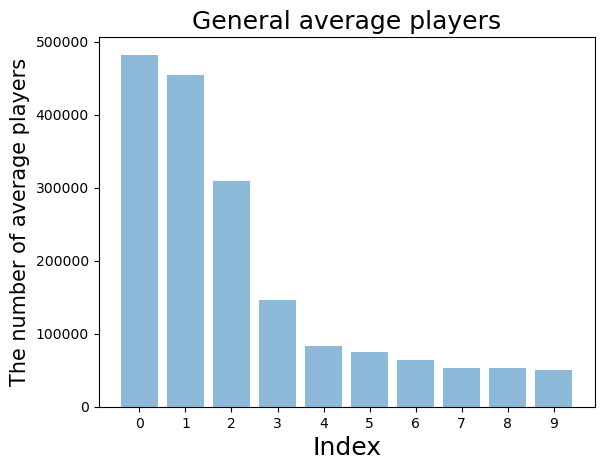

역대 최대 동시접속자 수
gamename
PLAYERUNKNOWN'S BATTLEGROUNDS       3236027
Counter-Strike: Global Offensive    1305714
Dota 2                              1291328
Cyberpunk 2077                       830387
Terraria                             486918
                                     ...   
Half-Life 2: Lost Coast                 153
Garfield Kart                           150
Confess My Love                         125
Carpe Diem                               90
Plug & Play                              90
Name: peak, Length: 1260, dtype: int64
gamename
PLAYERUNKNOWN'S BATTLEGROUNDS       3236027
Counter-Strike: Global Offensive    1305714
Dota 2                              1291328
Cyberpunk 2077                       830387
Terraria                             486918
Fallout 4                            471955
Life is Strange 2                    468634
Grand Theft Auto V                   360761
HITMAN? 2                            356867
World of Warships                    353413
Monst

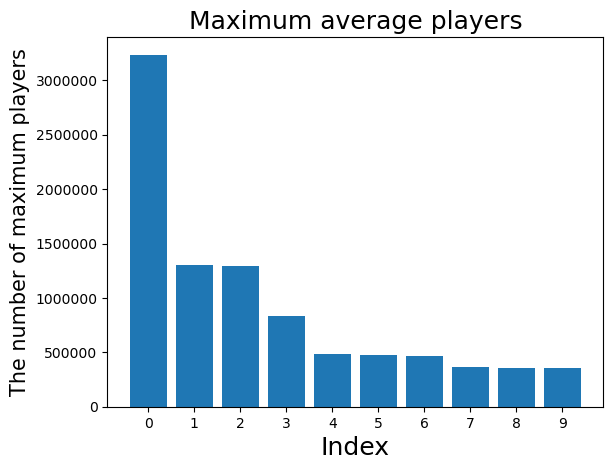

In [132]:
#게임 당 총 기간에서 기간별 평균 동접자 수의 평균
#전반적인 동접자 수 파악
grouped_games_avg_players = df2.groupby('gamename')['avg'].mean().sort_values(ascending=False)
#총 기간에서 게임별 역대 최대 동접자 수 
grouped_games_max_players = df2.groupby('gamename')['peak'].max().sort_values(ascending=False)

print("역대 평균 동시접속자 수")
print(grouped_games_avg_players)
print(grouped_games_avg_players.head(20))



grouped_avg1 = grouped_games_avg_players.reset_index()
grouped_avg1 = grouped_avg1[:10]
print("상위 10개 역대 평균 동시접속자 수")
print(grouped_avg1)


plt.bar(grouped_avg1.index, grouped_avg1['avg'], alpha=0.5)
plt.title('General average players', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.ylabel('The number of average players', fontsize=15)
plt.xticks(np.arange(10), grouped_avg1.index , fontsize=10)
plt.show()

##
print("역대 최대 동시접속자 수")
print(grouped_games_max_players)
print(grouped_games_max_players.head(20))

grouped_max = grouped_games_max_players.reset_index()
grouped_max = grouped_max[:10]

print("상위 10개 역대 최대 동시접속자 수")
print(grouped_max)

plt.bar(grouped_max.index, grouped_max['peak'])
plt.title('Maximum average players', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.ylabel('The number of maximum players', fontsize=15)
plt.xticks(np.arange(10), grouped_max.index , fontsize=10)

curr_val = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in curr_val])

plt.show()
#총 1260개의 게임이 존재하고, 전체 기간 대비 전반적으로 동접자 수가 가장 높은 게임은 PLAYERUNKNOWN'S BATTLEGROUNDS이다.
#역대 최대 동접자 수가 가장 높은 게임도 PLAYERUNKNOWN'S BATTLEGROUNDS이다. 



연도별 평균 동접자
year
2021    3492.561073
2020    3158.675927
2018    3014.045170
2017    2843.182719
2015    2782.385191
2016    2629.729685
2019    2559.648512
2014    2545.695657
2013    2049.903427
2012    1857.176512
Name: avg, dtype: float64


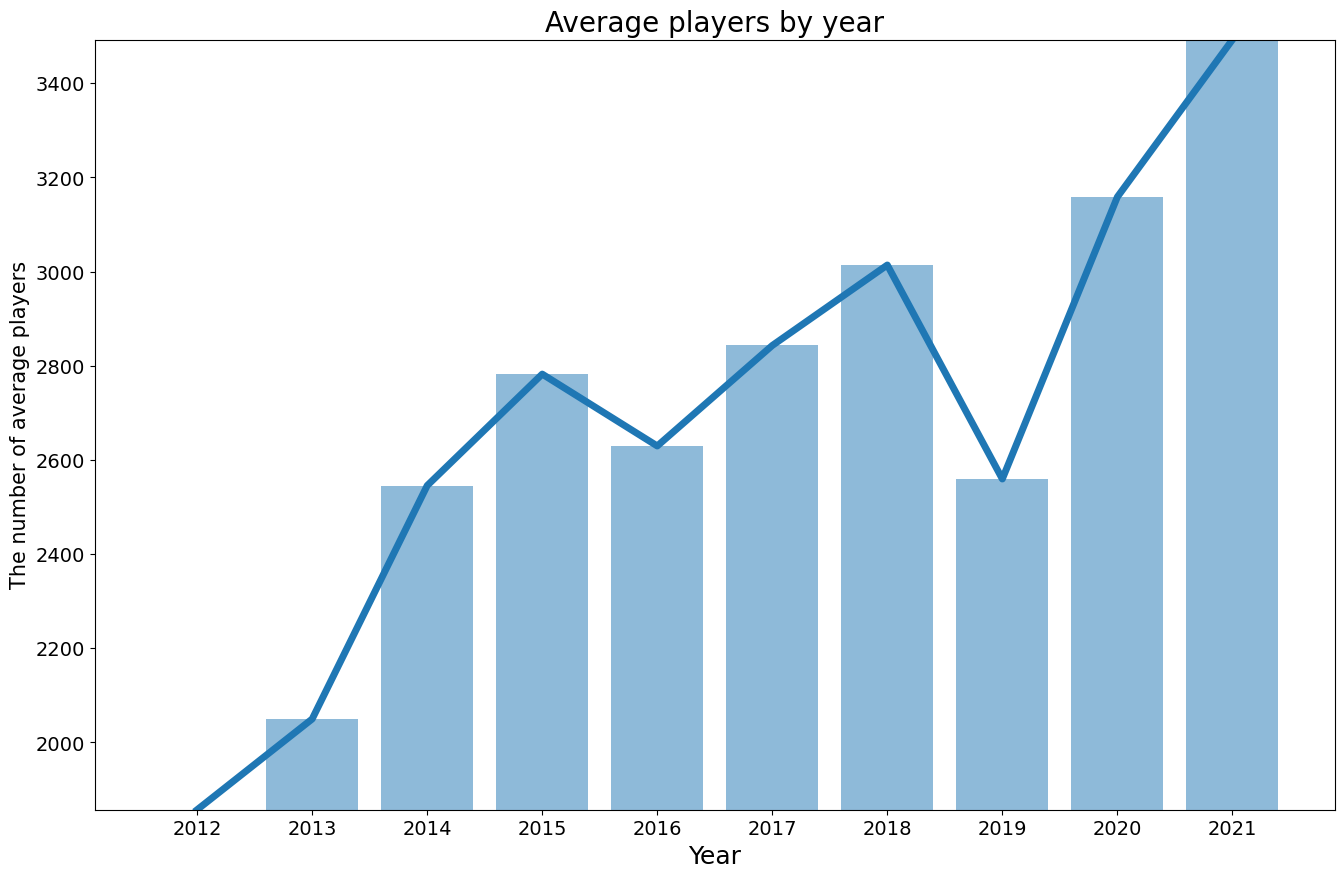

연도별 평균 최대 동접자
year
2021    6386.627186
2018    6189.291110
2020    5988.573398
2017    5635.775299
2015    5569.266234
2014    5218.345246
2016    5153.279176
2019    5002.182984
2013    4339.295792
2012    3914.659649
Name: peak, dtype: float64


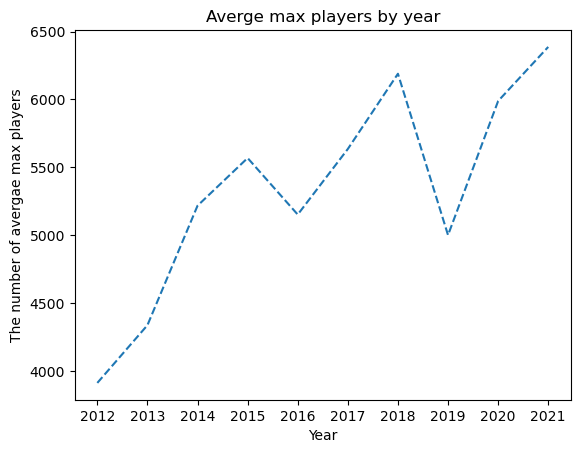

In [188]:
#연도별 평균, 평균 최대 동접자
grouped_year_avg_players = df2['avg'].groupby(df2['year']).mean().sort_values(ascending=False)
grouped_year_peak_players = df2.groupby('year')['peak'].mean().sort_values(ascending=False)

print("연도별 평균 동접자")
print(grouped_year_avg_players)

grouped_avg = df2['avg'].groupby(df2['year'])
x1 = list(grouped_avg.groups.keys())
y1 = [grouped_avg.mean().min(), grouped_avg.mean().max()]
ax1 = grouped_avg.mean().plot(kind='line', figsize=[16,10], linewidth=5, fontsize=14, xticks=x1, ylim=y1)
ax1.set_xlabel('Year', fontdict={'fontsize': 16})
ax1.set_ylabel('Average Players', fontdict={'fontsize': 16})

plt.bar(x1, grouped_avg.mean(), alpha=0.5)
plt.title('Average players by year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('The number of average players', fontsize=15)
#plt.xticks(np.arange(10), x3, fontsize=10)
plt.show()


###

print("연도별 평균 최대 동접자")
print(grouped_year_peak_players)

grouped_peak = grouped_year_peak_players.reset_index()
grouped_peak = grouped_peak.sort_values(by=['year'])

xx = grouped_peak.year


ax2 = plt.plot(xx, grouped_peak.peak, '--')
plt.xticks( [2012, 2013,2014,2015,2016,2017,2018,2019,2020,2021],xx) #표시 값, 위치 값
plt.xlabel('Year')
plt.ylabel('The number of avergae max players')
plt.title('Averge max players by year')
plt.show()

월별 평균 동시접속자 수
month
1     3079.555741
2     2958.946605
12    2942.719318
3     2861.094525
4     2842.694788
Name: avg, dtype: float64


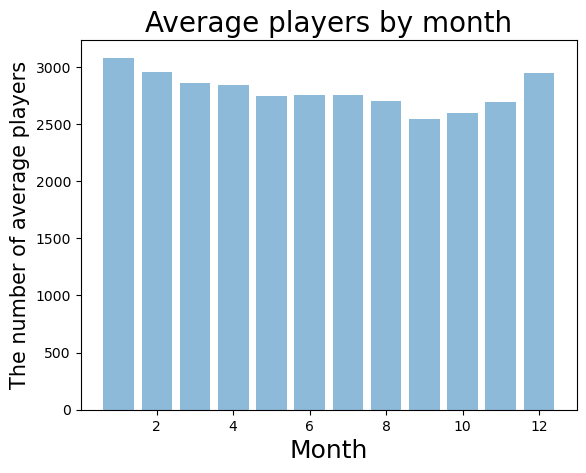

상위 10개 시기별 평균 동시접속자 수
date
2018-1     3963.205000
2020-4     3841.060860
2017-12    3759.669624
2018-2     3588.343289
2021-1     3567.783667
2020-5     3480.561930
2020-12    3449.315327
2017-11    3448.857949
2021-2     3417.457975
2018-3     3416.943274
Name: avg, dtype: float64
        date          avg
0    2012-10  1695.099350
1    2012-11  1725.741120
2    2012-12  1879.577844
3     2012-7  2087.497843
4     2012-8  1877.019767
..       ...          ...
99    2020-7  3077.947527
100   2020-8  3020.793502
101   2020-9  2851.569332
102   2021-1  3567.783667
103   2021-2  3417.457975

[104 rows x 2 columns]


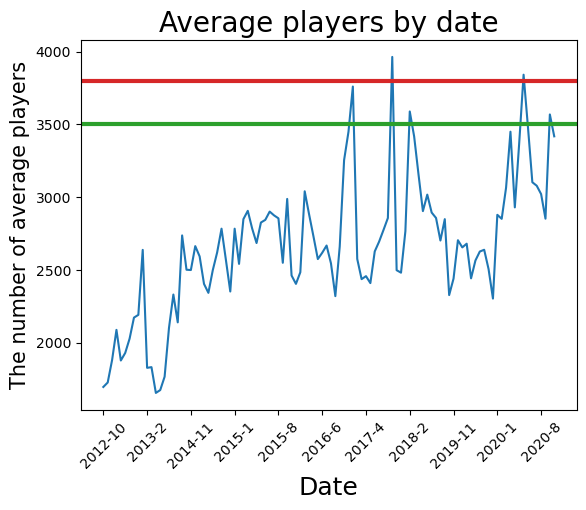

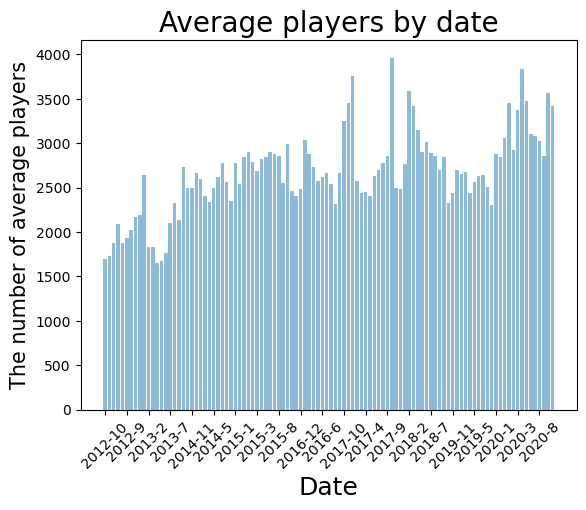

In [197]:
#월별 평균 동시접속자 수 
#평균적으로 동시접속자 수가 많은 시기, 월 파악
grouped_date_avg_players = df2.groupby('date')['avg'].mean().sort_values(ascending=False)

print("월별 평균 동시접속자 수")

g1 = df2.groupby('month')['avg'].mean().sort_values(ascending=False)

print(g1.head())

g1 =g1.reset_index()
plt.bar(g1['month'], g1.avg, alpha=0.5)
plt.title('Average players by month', fontsize=20)
plt.xlabel('Month', fontsize=18)

plt.ylabel('The number of average players', fontsize=15)
plt.show()

print("상위 10개 시기별 평균 동시접속자 수")
print(grouped_date_avg_players.head(10))

grouped_date = df2.groupby('date')['avg'].mean().reset_index()
#grouped_date = grouped_date[:10]
print(grouped_date)
x3 = grouped_date.date
y3 = [grouped_date.min(), grouped_date.max()]

###

xs = grouped_date['date'].to_list()
xlabels = grouped_date['date'].to_list()
ys = grouped_date['avg'].to_list()
#ax = plt.plot(xs, ys)
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.title('Average players by date', fontsize=20)
plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.locator_params(axis='x', nbins=len(xlabels)/10)

plt.xlabel('Date', fontsize=18)
plt.ylabel('The number of average players', fontsize=15)
#

ax.axhline(y=3800, linewidth=3, color='#d62728')
ax.axhline(y=3500, linewidth=3, color='#2ca02c')
plt.show()


plt.bar(x3, grouped_date.avg, alpha=0.5)
plt.title('Average players by date', fontsize=20)
plt.xlabel('Date', fontsize=18)

plt.ylabel('The number of average players', fontsize=15)
plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.locator_params(axis='x', nbins=len(xlabels)/5)





plt.show()


In [191]:
#데이터 결합

df_main = df_steam_games[["name", "popular_tags"]]

#df_main['total_avg_player']=df2.groupby('gamename').avg.transform('mean')


#게임별 동접자 수 평균을 기준으로 두 데이터 프레임을 결합합니다.

#기준을 통합하기 위해 이름을 바꿔줍니다.
df_main.rename(columns={'name':'gamename'}, inplace=True)

#게입별 동접자 수 평균 출력 결과를 저장합니다.
grouped_games_avg_players = df2.groupby('gamename')['avg'].mean()
steam_games_avg_players = grouped_games_avg_players.reset_index()

#평균 동접자 수를 기준으로 두 데이터 프레임을 결합합니다. 
new_df = pd.merge(left=steam_games_avg_players, right=df_main, how="inner", on = "gamename")
print(new_df)
print(new_df.info())

              gamename          avg  \
0    100% Orange Juice   203.529286   
1                  140     5.129663   
2          60 Seconds!    71.822714   
3        7 Days to Die  9405.545172   
4         911 Operator   114.976182   
..                 ...          ...   
830             Zup! 3     9.914200   
831          ibb & obb    30.755122   
832             klocki     5.270000   
833          rFactor 2   381.785156   
834  theHunter Classic   731.703951   

                                          popular_tags  
0    Anime,Board Game,Cute,Multiplayer,Card Game,St...  
1    Platformer,Indie,Rhythm,Minimalist,Music,Great...  
2    Survival,Post-apocalyptic,Singleplayer,Strateg...  
3    Early Access,Survival,Zombies,Open World,Craft...  
4    Simulation,Strategy,Management,Singleplayer,In...  
..                                                 ...  
830  Casual,Puzzle,Indie,Minimalist,Relaxing,Single...  
831  Co-op,Puzzle,Local Co-Op,Online Co-Op,Platform...  
832  Puzzle,Indie,

Counter({'Singleplayer': 697, 'Action': 557, 'Adventure': 488, 'Indie': 469, 'Multiplayer': 460, 'Atmospheric': 344, 'Great Soundtrack': 337, 'Co-op': 314, 'Open World': 292, 'Strategy': 257, 'First-Person': 248, 'Simulation': 231, 'Funny': 218, 'Story Rich': 217, 'Casual': 216, 'Shooter': 215, 'RPG': 214, '2D': 197, 'Difficult': 194, 'Sandbox': 191, 'Survival': 178, 'Masterpiece': 166, 'Third Person': 161, 'Early Access': 152, 'Fantasy': 152, 'FPS': 148, 'Sci-fi': 148, 'Online Co-Op': 146, 'Gore': 130, 'Comedy': 120, 'Massively Multiplayer': 120, 'Exploration': 110, 'Puzzle': 99, 'Horror': 98, 'Tactical': 96, 'Building': 93, 'Realistic': 92, 'Violent': 92, 'Classic': 89, 'Moddable': 85, 'Pixel Graphics': 82, 'Female Protagonist': 79, 'PvP': 77, 'Cute': 76, 'Crafting': 76, 'War': 75, 'Psychological Horror': 74, 'Platformer': 70, 'Anime': 68, 'Management': 68, 'Survival Horror': 67, 'Third-Person Shooter': 66, 'Replay Value': 65, 'Family Friendly': 63, 'Character Customization': 63, 'Da

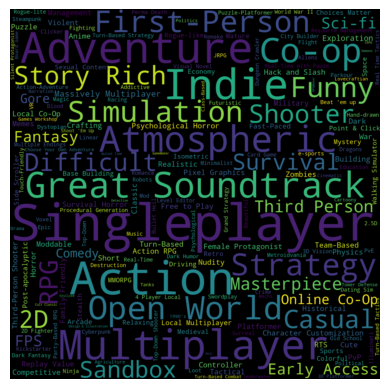

상위 20개 인기 게임 태그 성향 분석


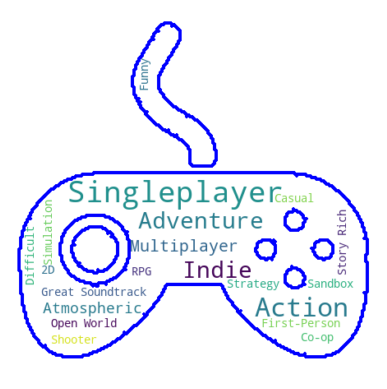

In [201]:
#wordcloud를 위한 df_wordcloud 전처리

#각 행의 태그를 모두 모아 리스트 tags 리스트에 넣어줍니다.

tags1 = []
for elem in new_df.popular_tags:
    elem = str(elem)
    tags1.extend(elem)

#리스트 원소를 모두 하나의 문자열로 조합합니다.

all_tags1 = "".join(tags1)

splited1 = all_tags1.split(',')
cnt_tags_p = Counter(splited1)
print(cnt_tags_p)
#word cloud 형성

new_wc = WordCloud(width=800, height=800, scale=2.0, max_font_size=500).generate_from_frequencies(cnt_tags_p)
print("인기 게임 태그 성향 분석")
plt.imshow(new_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

print("상위 20개 인기 게임 태그 성향 분석")
new_wc20 = WordCloud(max_words=20, background_color='white', mask=transformed_console_mask, contour_width=3, contour_color = 'blue', height=800, scale=2.0, max_font_size=500).generate_from_frequencies(cnt_tags_p)
plt.imshow(new_wc20, interpolation='bilinear')
plt.axis("off")
plt.show()